In [1]:
import os
os.chdir('x:/xx/xxx/titanic')###这里以文件所在地址为准

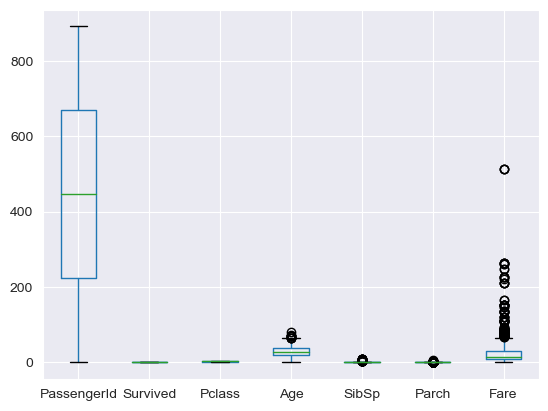

512.3292


In [2]:
import pandas as pd
#数据加载
df=pd.read_csv('train.csv')
#查找异常值(箱型图方法), 建议用spyder观测数据结构
import matplotlib.pyplot as plt
plt.figure()
p=df.boxplot(return_type='dict')#绘制箱型图
x=p['fliers'][6].get_xdata()#fliers为异常值标签
y=p['fliers'][6].get_ydata()#x为x轴数据，y为y轴数据
plt.show()
print(df['Fare'].max())#结合图中Fare中存在的最大值为异常值

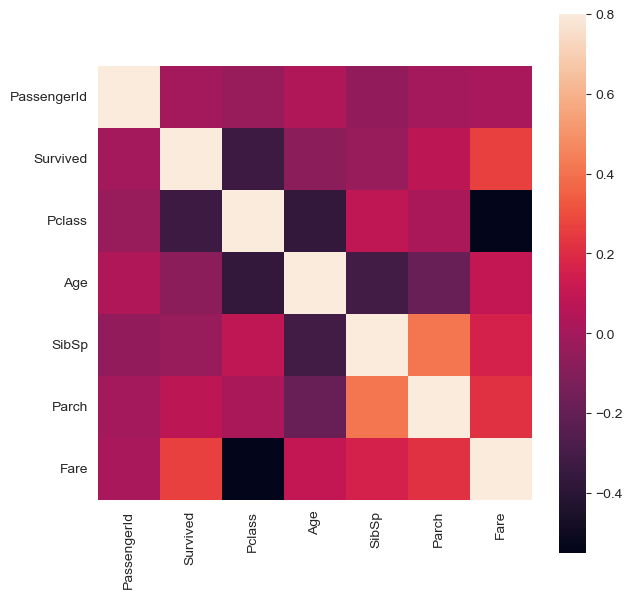

In [3]:
import seaborn as sns
corrmat=df.corr()#得到相关系数
plt.subplots(figsize=(7,7))
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

In [4]:
df_head=df.head(5)#前五个数据
df_head

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df_tail=df.tail(5)#最后五个数据
df_tail

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
columns_name=df.columns#特征名
columns_name

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
info=df.info()#数据信息
info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
total=df.isnull().sum().sort_values(ascending=False)#空缺值数量
total

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [10]:
df_mode=pd.read_csv('train.csv')
print(df_mode['Age'].isnull().sum())
df_mode['Age']=df_mode['Age'].fillna(df_mode['Age'].mode()[0])#使用众数填充
print(df_mode['Age'].isnull().sum())

177
0


In [11]:
df_lagrange=pd.read_csv('train.csv')
print(df_lagrange['Age'].isnull().sum())
#使用拉格朗日插值法填充
from scipy.interpolate import lagrange
#自定义插值函数
#s为列向量，n插值位置，k为取前后数据个数，默认为5
def ployinterp_column(s,n,k=5):
    y=s.reindex(list(range(n-k,n))+list(range(n+1,n+1+k)))#取前后k个数
    y=y[y.notnull()] #删除空值
    return lagrange(y.index,list(y))(n) #插值并返回结果
#逐个元素判断是否需要插值
for i in range(len(df_lagrange['Age'])):
    if (df_lagrange['Age'].isnull())[i]:
        df_lagrange['Age'][i]=ployinterp_column(df_lagrange['Age'],i)
print(df_lagrange['Age'].isnull().sum())

177


C:\Users\22236\AppData\Local\Temp\ipykernel_6888\1239291647.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lagrange['Age'][i]=ployinterp_column(df_lagrange['Age'],i)
C:\Users\22236\AppData\Local\Temp\ipykernel_6888\1239291647.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lagrange['Age'][i]=ployinterp_column(df_lagrange['Age'],i)
C:\Users\22236\AppData\Local\Temp\ipykernel_6888\1239291647.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

0


C:\Users\22236\AppData\Local\Temp\ipykernel_6888\1239291647.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lagrange['Age'][i]=ployinterp_column(df_lagrange['Age'],i)
C:\Users\22236\AppData\Local\Temp\ipykernel_6888\1239291647.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lagrange['Age'][i]=ployinterp_column(df_lagrange['Age'],i)
C:\Users\22236\AppData\Local\Temp\ipykernel_6888\1239291647.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

In [12]:
import numpy as np
Age_mode=df_mode['Age']
n1=(Age_mode-Age_mode.min())/(Age_mode.max()-Age_mode.min())#最小-最大规范化
n2=(Age_mode-Age_mode.mean())/Age_mode.std() #零-均值规范化
n3=Age_mode/10**np.ceil(np.log10(Age_mode.abs().max()))#小数定标规范化
print(n1,n2,n3)

0      0.271174
1      0.472229
2      0.321438
3      0.434531
4      0.434531
         ...   
886    0.334004
887    0.233476
888    0.296306
889    0.321438
890    0.396833
Name: Age, Length: 891, dtype: float64 0     -0.497514
1      0.714647
2     -0.194474
3      0.487367
4      0.487367
         ...   
886   -0.118714
887   -0.724794
888   -0.345994
889   -0.194474
890    0.260086
Name: Age, Length: 891, dtype: float64 0      0.22
1      0.38
2      0.26
3      0.35
4      0.35
       ... 
886    0.27
887    0.19
888    0.24
889    0.26
890    0.32
Name: Age, Length: 891, dtype: float64


In [13]:
tmp=df_mode
tmp.replace([512.329200],df['Fare'].mean())# 将异常值替换为平均值

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [14]:
tmp['Survived'].value_counts()#统计乘客死亡和存活人数

0    549
1    342
Name: Survived, dtype: int64

In [15]:
tmp['Sex'].value_counts()#统计乘客中男女性别人数

male      577
female    314
Name: Sex, dtype: int64

In [16]:
survive = tmp['Sex'][tmp['Survived']==1].value_counts()#统计男女获救人数
survive

female    233
male      109
Name: Sex, dtype: int64

In [17]:
tmp['Pclass'].corr(tmp['Survived'])#使用corr()函数判断属性间相关性

-0.3384810359610148

<AxesSubplot:title={'center':'Fare'}, xlabel='[Pclass]'>

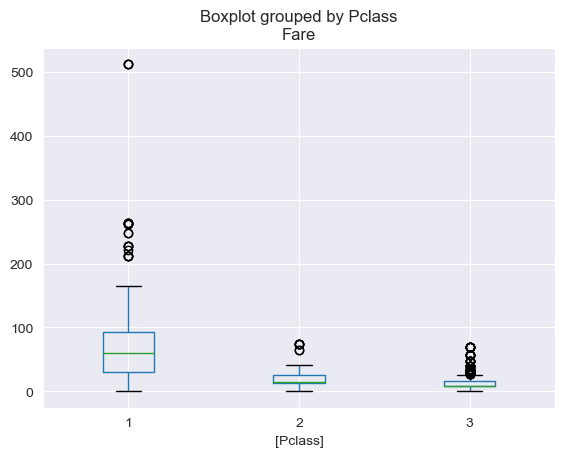

In [18]:
tmp.boxplot(['Fare'],['Pclass'])#绘制乘客票价与舱位等级箱型图Boxplot

In [19]:
#保存预处理后数据集
tmp.to_json('titanic_after_preprocessing.json') #保存到json文件
tmp.to_csv('titanic_after_preprocessing.csv') #保存到csv文件
tmp.to_excel('titanic_after_preprocessing.xls')#保存到excel文件

C:\Users\22236\AppData\Local\Temp\ipykernel_6888\3065742219.py:4: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  tmp.to_excel('titanic_after_preprocessing.xls')#保存到excel文件
